In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
#download readme, and save in dir
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt',
                           'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x1bba0c7bf08>)

In [3]:
#download file
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                           'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x1bb9deecf88>)

In [4]:
#info on stations

In [27]:
#load file and read line
filename = "stations.txt"

with open(filename) as f_obj:
    lines = f_obj.readlines()

"""for line in lines:
    print(line.rstrip())"""

'for line in lines:\n    print(line.rstrip())'

In [28]:
# create np array, specifying details
all_stations = np.genfromtxt("stations.txt", delimiter=[11,9,10,7,3,32,4,4,5],
                                                         names=['id','latitude','longitude','ELEVATION',"STATE",'NAME', 'GSN FLAG', 'HCN/CRN FLAG', 'WMO ID '],
                                                         dtype=['U11','d','d','d',"U4", "U33",'U5','U5','U6'],
                                                         autostrip=True)

In [29]:
len(all_stations)

115084

In [30]:
all_stations

array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('ELEVATION', '<f8'), ('STATE', '<U4'), ('NAME', '<U33'), ('GSN_FLAG', '<U5'), ('HCNCRN_FLAG', '<U5'), ('WMO_ID', '<U6')])

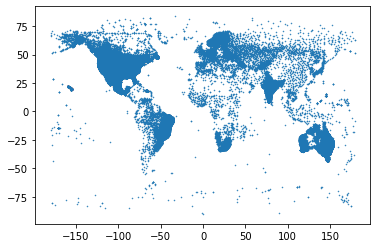

In [9]:
pp.plot(all_stations['longitude'], all_stations['latitude'], '.', markersize=1)

In [24]:
#create series, with 'NEW' in 'NAME'
stations_new = all_stations[np.char.find(all_stations['NAME'], 'NEW') == 0]

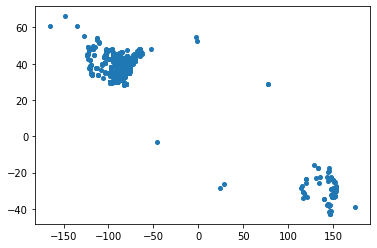

In [25]:
#plotting station_denmark series
pp.plot(stations_new['longitude'], stations_new['latitude'], '.', markersize=8)

In [12]:
# function which plots all station with the entered string in Name
def plot_station(station):
    result_station = all_stations[np.char.find(all_stations['NAME'], station) == 0]
    pp.plot(result_station ['longitude'], result_station ['latitude'], '.', markersize=5)

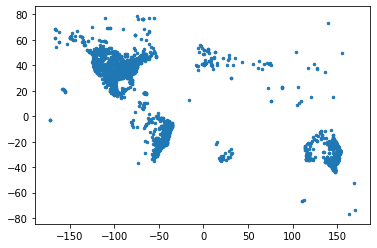

In [13]:
plot_station("CA")

In [14]:
#plots all station in entered string State
def station_state(state):
    result_state = all_stations[all_stations['STATE'] == state]
    pp.plot(result_state['longitude'], result_state['latitude'], '.', markersize=2)

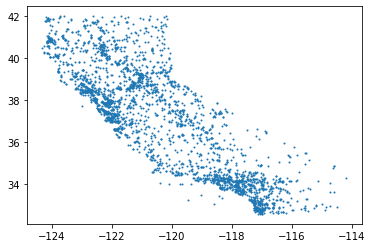

In [15]:
station_state("CA")

In [16]:
#fucntion with station name input, which returns info of station
def station_info(station):
    return all_stations[all_stations["NAME"] == station]

In [17]:
station_info("BUFFALO RANGE")

array([('ZI000067977', -21.017, 31.583, 430., '', 'BUFFALO RANGE', '', '', '67977')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('ELEVATION', '<f8'), ('STATE', '<U4'), ('NAME', '<U33'), ('GSN_FLAG', '<U5'), ('HCNCRN_FLAG', '<U5'), ('WMO_ID', '<U6')])